In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#read data-set as float32 bcaz file is very large&better to read in float
data=pd.read_csv('A_Z Handwritten Data.csv').astype('float32')
data.head(10)

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
#split data into X and y
#X contains a character image & y  contains a label of that image

X = data.drop('0',axis = 1)  #1 as column
y = data['0']                #0 as label

In [9]:
#Performing Split Using Sklearn
#performing train_test_split on X and y,to get training and testing data.

from sklearn.model_selection import train_test_split #train_test_split() method,used to split our data into train and test sets
from sklearn.utils import shuffle

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) #test_size for percentage of dataset to test split

In [10]:
#Reshaping the Training and Testing data
#we can display it in the form of image, as initially in the csv file they are present in 784 columns of pixel data
#So we convert them to 28×28 pixels

x_train = np.reshape(x_train.values, (x_train.shape[0], 28,28))
x_test = np.reshape(x_test.values, (x_test.shape[0], 28,28))

print("Shape of Training data: ", x_train.shape)  #297960 images for trainging
print("Shape of Testing data: ", x_test.shape)    #74490 images for testing

Shape of Training data:  (297960, 28, 28)
Shape of Testing data:  (74490, 28, 28)


In [11]:
#Shuffle the training data
#so we can see training on shuffled characters

shuffle_data = shuffle(x_train)

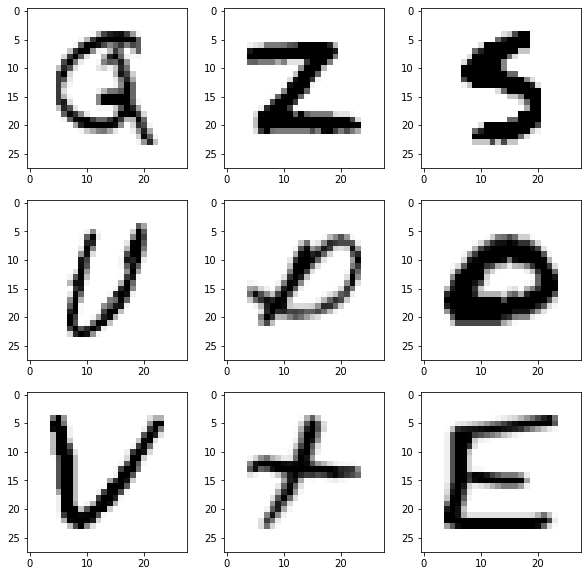

In [13]:
#Visualize our training data
#to check that we have successfully converted them to view in image form

import cv2        #cv2 to process images and to identify objects,handwriting 
fig, axes = plt.subplots(3,3, figsize = (10,10))  #3rows,3columns,figsize of 10,10 inches 
axes = axes.flatten()  #instead of an iterator, it returns a flattened version of the array
for i in range(9):
    _, shu = cv2.threshold(shuffle_data[i], 30, 200, cv2.THRESH_BINARY) #threshold to perform segmentation in an image,& to binarize it (turn it into a binary image)
    axes[i].imshow(np.reshape(shuffle_data[i], (28,28)), cmap="Greys")  #cmap,using the gray colourmap to show the image
plt.show() 

In [14]:
#again Reshaping Data
#In this we have reshaped our image data, 
#so that we can use this data for training of our model

#training of our model.
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1], x_train.shape[2],1) #normalizing the pixel values(to 1) of grayscale images
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2],1)
print("New shape of training data: ", x_train.shape)
print("New shape of testing data: ",  x_test.shape)

#x_train.shape[0],gives no.of rows is 2D array,x_train.shape[1],gives no.of columns in 2D arr

New shape of training data:  (297960, 28, 28, 1)
New shape of testing data:  (74490, 28, 28, 1)


In [18]:
#Converting to_categorical
#Now we have to convert our single float values to categorical values,
#              using to_categorical method given by tensorflow, keras

import tensorflow
from tensorflow.keras.utils import to_categorical                   #to_categorical()--> numpy array,which has integers that represent different categories,
y_training = to_categorical(y_train, num_classes = 26, dtype='int') #  can be converted into a matrix which has binary values 
y_testing = to_categorical(y_test, num_classes = 26, dtype='int')   #  and has columns = no.of categories in the data
print("New shape of training labels: ", y_training.shape)           #also num_classes=total no.of classes(as outputs)
print("New shape of testing labels: ", y_testing.shape)

New shape of training labels:  (297960, 26)
New shape of testing labels:  (74490, 26)


In [19]:
#Model Creation
#Now,we create a Convolutional Neural Networks (CNN) model, 
#which classify images as it extracts features of images using several hidden layers 
#or we say several layers of filters

#we create CNN using tensorflow(&keras) for data automation, model tracking, performance monitoring, and model retraining
#   it helps to recognise handwritten characters of english alphabets(A-Z)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [20]:
#model we have created consist of
#1)3 convolutional layers(Conv2D) of 64,64,64 layers each followed by MaxPool layers that are used to reduce the
#                                                                                  number of features extracted
#2)after flatten the layers, we created two fully connected layers (Dense layer) of 128,265 layers
#3)at last we have created our output layer that is also a fully connected layer with softmax as an activation function

model = Sequential()  #plain stack of layers where each layer has exactly one input tensor(multi-dimensional array) and 
                      #   one output tensor(multi-dimensional array)
model.add(Conv2D(64 , (3, 3), activation='relu', input_shape=(28,28,1))) #2D-convolution layer(partial convolution over images)&(3,3) for shape of convolutional kernel
                              #relu=rectified linear activation function,will output the input directly
model.add(MaxPool2D(2, 2))  #pooling over inputs which internally contain various planes of input&(2,2) for shape of convolutional kernel
 
model.add(Conv2D(64, (3, 3), activation='relu'))  #adding 64 layers for second time
model.add(MaxPool2D(2, 2))
 
model.add(Conv2D(64, (3, 3), activation='relu'))  #aadding 64 layers for third time
model.add(MaxPool2D(2,2))
 
model.add(Flatten())  #to create 1D array where performing changes will not affect our original array
 
model.add(Dense(128,activation ="relu"))  #this layer is used to classify image based on output from convolutional layers
model.add(Dense(256,activation ="relu"))
model.add(Dense(26,activation ="softmax"))  #softmax function is used in last output layer

In [21]:
#Model Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 1, 1, 64)        

In [22]:
#Compile and Fit our model
#For training on our image and checking accuracy that it is classifying images to its correct alphabet or not

#We can compile a model by using compile attribute
#optimizer is a function that modifies attributes of neural network(like losses &learning rate)
                                  #  it helps in reducing the overall loss and improve accuracy
#Adam uses estimations of first&second moments of gradient to adapt learning rate for each weight of neural network
#categorical_crossentropy=Used as a loss function for multi-class classification model where there are two or more output labels
#    produces a one-hot array containing the probable match for each category using keras
#metric is a function that is used to judge the performance of our model for accuracy

model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])                                          
history = model.fit(x_train, y_training, epochs=5,  validation_data = (x_test,y_testing))

#Metric values are displayed during fit() and logged to the history object returned by fit()
#epoch means training neural network with all training data for one cycle,here no. of complete passes=5 
#validation_data=Data on which to evaluate the loss & model metrics at the end of each epoch

Epoch 1/5
9312/9312 [==============================] - 289s 31ms/step - loss: 0.2127 - accuracy: 0.9389 - val_loss: 0.1124 - val_accuracy: 0.9686
Epoch 2/5
9312/9312 [==============================] - 279s 30ms/step - loss: 0.1126 - accuracy: 0.9686 - val_loss: 0.1216 - val_accuracy: 0.9655
Epoch 3/5
9312/9312 [==============================] - 307s 33ms/step - loss: 0.0977 - accuracy: 0.9731 - val_loss: 0.0950 - val_accuracy: 0.9755
Epoch 4/5
9312/9312 [==============================] - 314s 34ms/step - loss: 0.0900 - accuracy: 0.9755 - val_loss: 0.1051 - val_accuracy: 0.9738
Epoch 5/5
9312/9312 [==============================] - 328s 35ms/step - loss: 0.0869 - accuracy: 0.9767 - val_loss: 0.0955 - val_accuracy: 0.9755


In [23]:
#save the model
#model is created and we have also trained our model
#now we save the model
model.save(r'handwritten_char_recog_model.h5')

In [24]:
#Creating Words Dictionary
#this word dictionary corresponding key to its values

words = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',
         16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

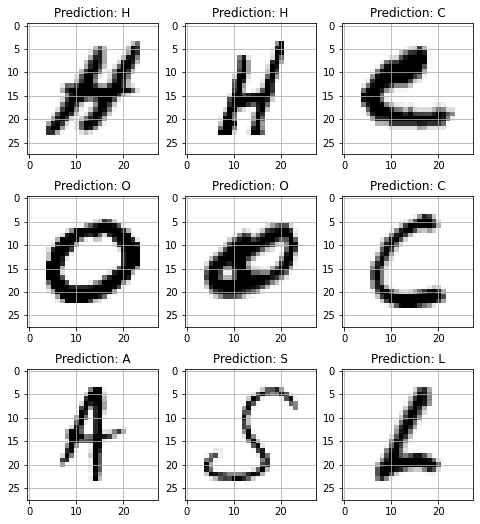

In [25]:
#Prediction Process
#to see how our model works by predicting alphabets present in an image

fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()  #flattened version of the array
for i,ax in enumerate(axes):    #enumerate() allows to iterate through a sequence & it keeps track of both index and the element
    image = np.reshape(x_test[i], (28,28))
    ax.imshow(image`, cmap="Greys")
    pred = words[np.argmax(y_testing[i])]  #argmax,argument to get index of the highest predicted probability for each data
    ax.set_title("Prediction: "+pred) 
    ax.grid() #to configure grid lines to structure our content

In [ ]:
#To visualize our model on Customize image
#custom image,able to predict the alphabet present in that image correctly or not

import cv2                    #cv2 to process images and to identify objects,handwriting ...
import tensorflow as tf       #(keras uses tensorflow as backend)
import matplotlib.pyplot as plt   #to visualize our data
import numpy as np
 
from keras.models import load_model    
model = load_model('handwritten_char_recog_model.h5')   #loads a model, saved through model
 
words = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',
         16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}
 
image = cv2.imread('G.png')
image_copy = image.copy() #copy image to another image object(to copy image & retain the original)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #cvtColor is used to convert an image from one color space to another.
                                               #COLOR_BGR2RGB=to convert BGR image to RGB before processing
image = cv2.resize(image, (400,440))
 
image_copy = cv2.GaussianBlur(image_copy, (7,7), 0)  #smoothening image(i.e.removing outlier pixels, that may be noise in image)
gray_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(gray_image, 100, 255, cv2.THRESH_BINARY_INV)  #if pixel intensity is less than set threshold, value set to 255, else set to 0 (black).
 
final_image = cv2.resize(img_thresh, (28,28))  
final_image =np.reshape(final_image, (1,28,28,1))
 
prediction = words[np.argmax(model.predict(final_image))]  #predict the label of a new set of data,
                                                           #returns the learned label for each object in the array
cv2.putText(image, "Prediction: " + prediction, (20,410), cv2.FONT_HERSHEY_DUPLEX, 1.3, color = (0,255,0))
cv2.imshow('handwritten character recognition is:', image)
 
while (1):
    k = cv2.waitKey(1) & 0xFF   
    if k == 27:
        break
cv2.destroyAllWindows()   #to close all windows at any time after exiting the script


1/1 [==============================] - 0s 107ms/step
